# pyautogui

In [1]:
# https://habr.com/ru/post/323962/
import pyautogui as gui
import pyperclip as cb
import time, re
ctrl = 'ctrl'
alt = 'alt'
shift = 'shift'
tab = 'tab'
enter = 'enter'


In [2]:
trtable = ''.maketrans('йцукенгшщзхъфывапролджэ\\ячсмитьбю.ё',
                       'qwertyuiop[]asdfghjkl;\'\\zxcvbnm,./`')
trtable2 = ''.maketrans('ЙЦУКЕНГШЩЗЪХФЫВАПРОЛДЖЭ/ЯЧСМИТЬБЮ,Ё',
                       'QWERTYUIOP}{ASDFGHJKL:"|ZXCVBNM<>?~')
for k,v in trtable2.items():
    trtable[k]=v

In [10]:
gui.hotkey(ctrl,shift,tab)

for x in range(7): 
    gui.press(tab)

In [86]:
gui.hotkey(ctrl,shift,tab)

gui.moveTo(318,370)
gui.drag(None,80)
gui.hotkey(ctrl,'c')
time.sleep(0.1)
print(cb.paste())

Дата голосования:  01.07.2020
Наименование комиссии	ЦИК России
Число избирательных комиссий субъектов Российской Федерации - 87
Число избирательных комиссий субъектов Российской Федерации,территориальные комиссии которых приступили к передаче сведений - 87



In [19]:
gui.hotkey(ctrl,shift,tab)

moveTo(318,370)
drag(None,80)
gui.hotkey(ctrl,'c')
time.sleep(0.1)
print(cb.paste())

Дата голосования:  01.07.2020
Наименование комиссии	Адыгейская
Число участковых избирательных комиссий - 6
Число участковых избирательных комиссий, приступивших к передаче сведений - 6



In [3]:
 gui.confirm(text='', title='', buttons=['OK', 'Cancel','333'])

'333'

In [6]:
gui.hotkey(ctrl,shift,tab)

skip = 0 # 0 - 'продолжить', 1 - 'пропустить', 2 - 'остановиться'

while True: # просматриваем ЦИК
    gui.moveTo(318,370)
    gui.drag(None,80)
    gui.hotkey(ctrl,'c')
    time.sleep(0.1)
    txt = cb.paste()

    last_name = ''

    x1 = re.search(r'Число избирательных комиссий субъектов Российской Федерации - (\d*)',txt)
    if not x1:
        x2 = gui.confirm(text='prestart Число РИКов', title='', buttons=['продолжить', 'пропустить','остановиться'])
        if x2=='продолжить':
            continue
        elif x2=='пропустить':
            skip = 1
        else: 
            skip = 2
        break
    RIK_count = int(x1.group(1))
    break
if skip==1 or skip==2:
    raise Exception()
print(RIK_count)

for irik in range(28,34):#range(78,RIK_count):
    while True: # контрольный просмотр ЦИК
        gui.moveTo(318,370)
        gui.drag(None,80)
        gui.hotkey(ctrl,'c')
        time.sleep(0.1)
        txt = cb.paste()

        x1 = re.search(r'Наименование комиссии\t([^\r]*)',txt)
        if not x1:
            x2 = gui.confirm(text='start Наименование комиссии', title='', buttons=['продолжить', 'пропустить','остановиться'])
            if x2=='продолжить':
                continue
            elif x2=='пропустить':
                skip = 1
            else: 
                skip = 2
            break
        if last_name==x1.group(1):
            print('waiting')
            time.sleep(1)
            continue
        last_name = x1.group(1)

        x1 = re.search(r'Число избирательных комиссий субъектов Российской Федерации - (\d*)',txt)
        if not x1:
            x2 = gui.confirm(text='precheck Число РИКов', title='', buttons=['продолжить', 'пропустить','остановиться'])
            if x2=='продолжить':
                continue
            elif x2=='пропустить':
                skip = 1
            else: 
                skip = 2
        break
    if skip==1 or skip==2:
        raise Exception()
        
    for a in range(irik+1): # входим в РИК
        #print(a)
        gui.press(tab)
    gui.press(enter)
    time.sleep(0.5)

    while True: # просматриваем РИК
        gui.moveTo(318,370)
        gui.drag(None,80)
        gui.hotkey(ctrl,'c')
        time.sleep(0.1)
        txt = cb.paste()
        
        x1 = re.search(r'Наименование комиссии\t([^\r]*)',txt)
        if not x1:
            x2 = gui.confirm(text='start Наименование комиссии', title='', buttons=['продолжить', 'пропустить','остановиться'])
            if x2=='продолжить':
                continue
            elif x2=='пропустить':
                skip = 1
            else: 
                skip = 2
            break
        if last_name==x1.group(1):
            print('waiting')
            time.sleep(1)
            for a in range(irik+1): # входим в РИК
                #print(a)
                gui.press(tab)
            gui.press(enter)
            time.sleep(1.5)
            continue
        last_name = ''
        RIK_name = x1.group(1)

        x1 = re.search(r'Число территориальных избирательных комиссий - (\d*)',txt)
        if not x1:
            x2 = gui.confirm(text='start Число ТИКов', title='', buttons=['продолжить', 'пропустить','остановиться'])
            if x2=='продолжить':
                continue
            elif x2=='пропустить':
                skip = 1
            else: 
                skip = 2
            break
        TIK_count = int(x1.group(1))
        break
    if skip==2:
        raise Exception()
    if skip==1:
        last_name = ''
        skip = 0
        gui.hotkey(alt,'left')
        time.sleep(0.5)
        continue

    print('---',irik,RIK_name,TIK_count)

    if irik==28:
        start=29
    else:start=0
    for itik in range(start,TIK_count) : # TIK_count
        while True: # контрольный просмотр РИК
            gui.moveTo(318,370)
            gui.drag(None,80)
            gui.hotkey(ctrl,'c')
            time.sleep(0.1)
            txt = cb.paste()
            x1 = re.search(r'Наименование комиссии\t([^\r]*)',txt)
            if not x1:
                x2 = gui.confirm(text='check RIK '+str(itik), title='', buttons=['продолжить', 'пропустить','остановиться'])
                if x2=='продолжить':
                    continue
                elif x2=='пропустить':
                    skip = 1
                else: 
                    skip = 2
            if last_name==x1.group(1):
                print('waiting')
                time.sleep(1)
                continue
            if 'ЦИК России'==x1.group(1):
                for a in range(irik+1): # входим в РИК
                    #print(a)
                    gui.press(tab)
                gui.press(enter)
                time.sleep(0.5)
                continue
            last_name = x1.group(1)
            break
        if skip==1:
            last_name = ''
            skip=0
            break
        if skip==2:
            raise Exception()

        for a in range(itik+1): # входим в ТИК
            #print(a)
            gui.press(tab)
        gui.press(enter)
        time.sleep(0.5)

        while True: # Просматриваем ТИК
            gui.moveTo(318,370)
            gui.drag(None,80)
            gui.hotkey(ctrl,'c')
            time.sleep(0.1)
            txt = cb.paste()

            x1 = re.search(r'Наименование комиссии\t([^\r]*)',txt)
            if not x1:
                x2 = gui.confirm(text='check TIK '+str(itik), title='', buttons=['продолжить', 'пропустить','остановиться'])
                if x2=='продолжить':
                    continue
                elif x2=='пропустить':
                    skip = 1
                else: 
                    skip = 2
                break
            if last_name==x1.group(1):
                print('waiting')
                time.sleep(1)
                for a in range(itik+1): # входим в ТИК
                    #print(a)
                    gui.press(tab)
                gui.press(enter)
                time.sleep(1.5)
                continue
            if re.search('УИК',x1.group(1)):
                print('УИК:'+str(irik)+'-'+str(itik)+' - '+RIK_name+' - '+TIK_name)
                gui.hotkey(alt,'left')
                time.sleep(0.5)
                continue
            last_name = x1.group(1)
            TIK_name = x1.group(1)
            break

        if skip==2:
            raise Exception()
        if skip==0: # сохраняем
            name = str(irik)+'-'+str(itik)+' - '+RIK_name+' - '+TIK_name
            print(itik,repr(name))
            gui.hotkey(ctrl,'s')
            time.sleep(0.4)
            gui.hotkey(alt,shift)
            time.sleep(0.2)
            gui.write(name.translate(trtable))
            time.sleep(0.3)
            gui.press(enter)
            time.sleep(1.5)
        skip = 0 # выходим из ТИКа
        gui.hotkey(alt,'left')
        time.sleep(0.5)
    skip = 0 # выходим из РИКа
    gui.hotkey(alt,'left')
    time.sleep(0.5)



87
--- 28 Приморский край 38
29 '28-29 - Приморский край - Хасанская'
30 '28-30 - Приморский край - Хорольская'
31 '28-31 - Приморский край - Черниговская'
32 '28-32 - Приморский край - Чугуевская'
33 '28-33 - Приморский край - Фокинская городская'
34 '28-34 - Приморский край - Яковлевская'
35 '28-35 - Приморский край - Спасская'
36 '28-36 - Приморский край - Дальнереченская'
37 '28-37 - Приморский край - Шкотовская'
--- 29 Ставропольский край 36
0 '29-0 - Ставропольский край - Александровская'
1 '29-1 - Ставропольский край - Андроповская'
2 '29-2 - Ставропольский край - Апанасенковская'
3 '29-3 - Ставропольский край - Арзгирская'
4 '29-4 - Ставропольский край - Благодарненская'
5 '29-5 - Ставропольский край - Буденновская'
6 '29-6 - Ставропольский край - Георгиевская'
7 '29-7 - Ставропольский край - Грачевская'
8 '29-8 - Ставропольский край - Ессентукская городская'
9 '29-9 - Ставропольский край - Железноводская городская'
10 '29-10 - Ставропольский край - Изобильненская'
11 '29-11 - 

# BeautifulSoup

In [2]:
from bs4 import BeautifulSoup

In [107]:
with open("20-2 - Чеченская Республика - Веденская.html") as fp:
    soup = BeautifulSoup(fp)

In [108]:
[x.string for x in soup.body.find_all('table')[1].td.find_all('a')]

['ЦИК России', 'Чеченская Республика', 'Веденская']

In [109]:
soup.body.find_all('table')[1].find_all('table')[3].td.find_all('font')[1].b.string

'18'

In [110]:
int(soup.body.find_all('table')[1].find_all('table')[3].td.font.b.string)

31

In [111]:
soup.body.find_all('table')[1].div.table.find_all('table')[1].tr.td.string

'УИК №34'

In [112]:
soup.body.find_all('table')[1].div.table.find_all('table')[1].find_all('tr')[6].td.b.string

'1199'

In [113]:
trs = soup.body.find_all('table')[1].div.table.find_all('table')[1].find_all('tr')

In [114]:
[ trs[0].td.a.string , trs[1].td.string , trs[2].td.string , trs[3].td.string , trs[4].td.string , 
 trs[6].td.b.string , trs[7].td.b.string ]

['УИК №34', '1322', '1309', '1250', '0', '1199', '51']

In [115]:
z = 5
[trs[0].find_all('td')[z].a.string , 
 int(trs[1].find_all('td')[z].string) , 
 int(trs[2].find_all('td')[z].string) , 
 int(trs[3].find_all('td')[z].string) , 
 int(trs[4].find_all('td')[z].string) , 
 int(trs[6].find_all('td')[z].b.string) , 
 int(trs[7].find_all('td')[z].b.string) ]

['УИК №40', 1043, 1033, 985, 0, 978, 7]

In [116]:
import os
home_dir = os.getcwd()
os.chdir('by_autogui')

FileNotFoundError: [WinError 2] Не удается найти указанный файл: 'by_autogui'

In [122]:
data = {}
with os.scandir(os.getcwd()) as it:
    for entry in it:
        if entry.name=='.' or entry.name=='..' or entry.is_dir():
            continue
        print(entry.name,end='\r')
        with open(entry.name) as fp:
            soup = BeautifulSoup(fp)
        try:
            path = [x.string for x in soup.body.find_all('table')[1].td.find_all('a')]
            if path[1] not in data: data[path[1]] = {}
            curdata = data[path[1]]
            curdata[path[2]] = {}
            curdata = curdata[path[2]]
            fonts = soup.body.find_all('table')[1].find_all('table')[3].td.find_all('font')
            assert fonts[0].contents[0].\
                startswith('Число участковых избирательных комиссий')
            if int(fonts[1].b.string) != int(fonts[0].b.string):
                print('не все приступили:',entry.name)
            N = int(fonts[1].b.string)
            trs = soup.body.find_all('table')[1].div.table.find_all('table')[1].find_all('tr')
            for z in range(N):
                curdata[trs[0].find_all('td')[z].a.string] = \
                [int(trs[1].find_all('td')[z].string) , 
                 int(trs[2].find_all('td')[z].string) , 
                 int(trs[3].find_all('td')[z].string) , 
                 int(trs[4].find_all('td')[z].string) , 
                 int(trs[6].find_all('td')[z].b.string) , 
                 int(trs[7].find_all('td')[z].b.string) ]
        except Exception as e:
            print('ERROR',entry.name,e)
            continue


не все приступили: 20-1 - Чеченская Республика - Ачхой-Мартановская.htmly).htmlказа.html
не все приступили: 20-11 - Чеченская Республика - Чеченская Республика.html
не все приступили: 20-19 - Чеченская Республика - Шелковская.html
не все приступили: 20-2 - Чеченская Республика - Веденская.html
не все приступили: 20-4 - Чеченская Республика - Грозный, Заводская.html
не все приступили: 20-5 - Чеченская Республика - Грозный, Ленинская.html
не все приступили:еспублика - Грозный, Октябрьская.html 20-6 - Чеченская Республика - Грозный, Октябрьская.html
не все приступили: 20-7 - Чеченская Республика - Грозный, Старопромысловская.html
не все приступили: 20-8 - Чеченская Республика - Гудермесская.html
ERROR 23-7 - Забайкальский край - Агинская.htmlкая городская.htmltmlhtml
ERROR 23-8 - Забайкальский край - Акшинская.html
ERROR 24-3 - Камчатский край - Елизовская.htmlская.html
ERROR 24-4 - Камчатский край - Мильковская.html
ERROR 24-6 - Камчатский край - Петропавловск-Камчатская (судовая).html
E

ERROR 31-18 - Амурская область - города Свободный.html
ERROR 31-19 - Амурская область - Селемджинского района.html
ERROR 31-2 - Амурская область - города Белогорск.html
ERROR 31-21 - Амурская область - Сковородинского района.html
ERROR 31-22 - Амурская область - Тамбовского района.html
ERROR 31-23 - Амурская область - Тындинского района.html
ERROR 31-24 - Амурская область - города Тында.html
ERROR 31-25 - Амурская область - ЗАТО Циолковский.html
ERROR 31-26 - Амурская область - Шимановского района.html
ERROR - Амурская область - города Шимановск.html 31-27 - Амурская область - города Шимановск.html
ERROR 31-28 - Амурская область - рабочего поселка (п.г.т.) Прогресс.html
ERROR 31-3 - Амурская область - Благовещенского района.html
ERROR 31-4 - Амурская область - города Благовещенск.html
ERROR 31-5 - Амурская область - Бурейского района.html
ERROR 31-6 - Амурская область - Завитинского района.html
ERROR- Амурская область - Зейского района.html 31-7 - Амурская область - Зейского района.htm

ERROR 37-28 - волгоградская область - Новониколаевская.html
ERROR 37-29 - Волгоградская область - Октябрьская.html
ERROR 37-3 - Волгоградская область - Волгоград, Дзержинская.html
ERROR 37-30 - Волгоградская область - Ольховская.html
ERROR 37-31 - Волгоградская область - Палласовская.html
ERROR 37-32 - Волгоградская область - Кумылженская.html
ERROR - Волгоградская область - Руднянская.html 37-33 - Волгоградская область - Руднянская.html
ERROR 37-34 - Волгоградская область - Светлоярская.html
ERROR 37-35 - Волгоградская область - Серафимовичская.html
ERROR 37-36 - Волгоградская область - Среднеахтубинская.html
ERROR 37-37 - Волгоградская область - Волгоградская область.html
ERROR 37-38 - Волгоградская область - Суровикинская.html
ERROR 37-39 - Волгоградская область - Урюпинская городская.html
ERROR 37-4 - Волгоградская область - Волгоград, Кировская.html
ERROR 37-4% _ Волгоградская область - Фроловская городская.html
ERROR 37-40 - Волгоградская область - Фроловская.html
ERROR - Волгогр

ERROR 54-42 - Нижегородская область - Павловская.htmlовская.html
ERROR 54-43 - Нижегородская область - Первомайск округ.html
ERROR 54-44 - Нижегородская область - Перевозский округ.html
ERROR 54-5 - Нижегородская область - Большеболдинская.html
ERROR 54-50 - Нижегородская область - Сосновская.html
ERROR 54-56 - Нижегородская область - Шарангская.html
ERROR 54-57 - Нижегородская область - Шатковская.html
ERROR 54-59 - Нижегородская область - Нижний Новгород, Автозаводская Южная.html
ERROR- Нижегородская область - Большемурашкинская.html 54-6 - Нижегородская область - Большемурашкинская.html
ERROR - Нижегородская область - Дзержинск, калининская.html 54-60 - Нижегородская область - Дзержинск, калининская.html
ERROR 54-7 - Нижегородская область - Бор округ.html
ERROR 54-8 - Нижегородская область - Бутурлинская.html
ERROR 54-9 - Нижегородская область - Вадская.html
ERROR 55-0 - Новгородская область - Батецкая.html
ERROR 55-10 - Новгородская область - Новгородская городская.html
ERROR 55-11

ERROR 60-20 - Пензенская область - Малосердобинская.html
ERROR 60-21 - Пензенская область - Мокшанская.html
ERROR 60-22 - Пензенская область - Наровчатская.html
ERROR 60-23 - Пензенская область - Неверкинская.html
ERROR 60-24 - Пензенская область - Нижнеломовская.html
ERROR 60-25 - Пензенская область - Никольская.html
ERROR - Пензенская область - Пачелмская.html 60-26 - Пензенская область - Пачелмская.html
ERROR 60-28 - Пензенская область - Сердобская.html
ERROR 60-29 - Пензенская область - Сосновоборская.html
ERROR 60-3 - Пензенская область - Пенза, Первомайская.html
ERROR 60-30 - Пензенская область - Спасская.html
ERROR 60-31 - Пензенская область - Тамалинская.html
ERROR 60-32 - Пензенская область - Шемышейская.html
ERROR 60-4 - Пензенская область - Зареченская городская.html
ERROR 60-5 - Пензенская область - Кузнецкая городская.html
ERROR 60-6 - Пензенская область - Башмаковская.html
ERROR 60-7 - Пензенская область - Бековская.html
ERROR 60-8 - Пензенская область - Белинская.html
ER

ERROR 67-32 - Свердловская область - Ирбитская.html
ERROR 67-33 - Свердловская область - Каменская.html
ERROR 67-34 - Свердловская область - Каменск-Уральская городская.html
ERROR 67-35 - Свердловская область - Камышловская городская.html
ERROR 67-36 - Свердловская область - Камышловская.html
ERROR - Свердловская область - Карпинская городская.html 67-37 - Свердловская область - Карпинская городская.html
ERROR 67-38 - Свердловская область - Качканарская городская.html
ERROR 67-39 - Свердловская область - Кировградская городская.html
ERROR 67-4 - Свердловская область - Артинская.html
ERROR 67-40 - Свердловская область - Краснотурьинская городская.html
ERROR 67-41 - Свердловская область - Красноуральская городская.html
ERROR 67-42 - Свердловская область - Красноуфимская городская.html
ERROR 67-43 - Свердловская область - Красноуфимская.html
ERROR 67-44 - Свердловская область - Кушвинская городская.html
ERROR 67-45 - Свердловская область - Лесная городская.html
ERROR 67-46 - Свердловская 

# requests

In [201]:
# https://habr.com/ru/post/280238/
# https://www.crummy.com/software/BeautifulSoup/bs4/doc.ru/bs4ru.html#next-sibling-previous-sibling

# скачиваем рут
# сохраняем
# выделяем количество субъектов
#  сохраняем ссылки на субъекты
#  выделяем data1, сохраняем
#   суммируем, выводим
# 
# скачиваем субъекты
# сохраняем (n - назв)
# выделяем кол-во  ТИКов (сравниваем всего и приступисвших к обработке)
#  сохраняем ссылки на ТИКи
#  выделяем data2, сохраняем
#   суммируем, сравниваем с data1
#
# скачиваем ТИКи
# сохраняем (n-m - субъект - ТИК)
# выделяем кол-во УИКов (сравниваем всего и приступисвших к обработке)
#  выделяем data3, сохраняем
#   суммируем, сравниваем с data2
#


In [4]:
import requests
import os
from bs4 import BeautifulSoup
import json, codecs
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36',
    'Cookie': 'izbirkomSession=d9f8facd-439e-4a09-b9aa-1e85b643bd83; JSESSIONID=b02782c466b6e7b98e342c5ecda1'
}

In [228]:
# скачиваем рут

url = 'http://www.vybory.izbirkom.ru/region/region/izbirkom?action=show&root=1&tvd=100100163596969&vrn=100100163596966&region=0&global=1&sub_region=0&prver=0&pronetvd=null&vibid=100100163596969&type=465'
r = requests.get(url, headers = headers)
#r.encoding = 'utf-8'
#r.text

In [229]:
#os.chdir(home_dir+'/../by_requests')
os.getcwd()

'D:\\Users\\feelus\\Repos\\__my_repos\\vybory\\Constitution\\by_requests'

In [230]:
# сохраняем

soup = BeautifulSoup(r.text)
with open('root.html', 'w') as output_file:
    output_file.write(r.text)

In [231]:
fonts = soup.body.find_all('table')[1].find_all('table')[3].td.find_all('font')
if int(fonts[1].b.string) != int(fonts[0].b.string):
    print('не все приступили:',entry.name)
# выделяем количество субъектов
N = int(fonts[1].b.string)
trs = soup.body.find_all('table')[1].div.table.find_all('table')[1].find_all('tr')

data = {}
links = []
for z in range(N):
    #  выделяем data1, сохраняем
    data[trs[0].find_all('td')[z].a.string] = \
    [int(trs[1].find_all('td')[z].string) , 
     int(trs[2].find_all('td')[z].string) , 
     int(trs[3].find_all('td')[z].string) , 
     int(trs[4].find_all('td')[z].string) , 
     int(trs[6].find_all('td')[z].b.string) , 
     int(trs[7].find_all('td')[z].b.string) ]
    #  сохраняем ссылки на субъекты
    links.append(trs[0].find_all('td')[z].a['href'])


In [232]:
#  выделяем data1, сохраняем
import json, codecs
with codecs.open('../data1.json','w', encoding='utf-8') as file:
    s = json.dumps(data,indent='\t',ensure_ascii=False)
    file.write(s)


In [233]:
links

['http://www.vybory.izbirkom.ru/region/region/izbirkom?action=show&tvd=100100163596969&vrn=100100163596966&region=0&global=1&sub_region=0&prver=0&pronetvd=null&vibid=100100163596970&type=465',
 'http://www.vybory.izbirkom.ru/region/region/izbirkom?action=show&tvd=100100163596969&vrn=100100163596966&region=0&global=1&sub_region=0&prver=0&pronetvd=null&vibid=100100163596971&type=465',
 'http://www.vybory.izbirkom.ru/region/region/izbirkom?action=show&tvd=100100163596969&vrn=100100163596966&region=0&global=1&sub_region=0&prver=0&pronetvd=null&vibid=100100163598012&type=465',
 'http://www.vybory.izbirkom.ru/region/region/izbirkom?action=show&tvd=100100163596969&vrn=100100163596966&region=0&global=1&sub_region=0&prver=0&pronetvd=null&vibid=100100163598013&type=465',
 'http://www.vybory.izbirkom.ru/region/region/izbirkom?action=show&tvd=100100163596969&vrn=100100163596966&region=0&global=1&sub_region=0&prver=0&pronetvd=null&vibid=100100163598014&type=465',
 'http://www.vybory.izbirkom.ru/reg

In [234]:
#   суммируем, выводим
total=0
geted=0
received=0
received_bad=0
YES=0
NO=0
for k,v in data.items():
    total+=v[0]
    geted+=v[1]
    received+=v[2]
    received_bad+=v[3]
    YES+=v[4]
    NO+=v[5]
(total,geted,received,received_bad,YES,NO)

(109190337, 74215555, 74114217, 604951, 57747288, 15761978)

In [224]:
# скачиваем субъекты
# сохраняем (n - назв)
# выделяем кол-во  ТИКов (сравниваем всего и приступисвших к обработке)
#  сохраняем ссылки на ТИКи
#  выделяем data2, сохраняем
#   суммируем, сравниваем с data1

from ipywidgets import HTML
from IPython.display import display
label = HTML()
display(label)

links2=[]
data2={}
specdata = []
for i in range(len(links)):
    url = links[i]
    r = requests.get(url, headers = headers)
    soup = BeautifulSoup(r.text)
    path = [x.string for x in soup.body.find_all('table')[1].td.find_all('a')]
    RIK = path[1]
    label.value = str(i)+' - '+RIK
    #print(i,RIK,end='\r')
    with open(str(i)+' - '+RIK+'.html', 'w') as output_file:
        output_file.write(r.text)
        
    if RIK not in data2:
        data2[RIK]={}
        
    fonts = soup.body.find_all('table')[1].find_all('table')[3].td.find_all('font')
    if int(fonts[1].b.string) != int(fonts[0].b.string):
        print('не все приступили:',entry.name)
    N = int(fonts[1].b.string)
    trs = soup.body.find_all('table')[1].div.table.find_all('table')[1].find_all('tr')

    for z in range(N):
        try:
            TIK = trs[0].find_all('td')[z].string
            data2[RIK][TIK] = \
            [int(trs[1].find_all('td')[z].string) , 
             int(trs[2].find_all('td')[z].string) , 
             int(trs[3].find_all('td')[z].string) , 
             int(trs[4].find_all('td')[z].string) , 
             int(trs[6].find_all('td')[z].b.string) , 
             int(trs[7].find_all('td')[z].b.string) ]
            try:
                if not TIK.startswith('УИК'):
                    links2.append(trs[0].find_all('td')[z].a['href'])
                else:
                    specdata.append((RIK,TIK))
            except Exception:
                specdata.append((RIK,TIK))
                pass
        except Exception as e:
            print(i,z,RIK)
            print(TIK)
            raise(e)
specdata

HTML(value='')

[('Нижегородская область', 'Данные дистанционного электронного голосования'),
 ('город Москва', 'Данные дистанционного электронного голосования'),
 ('Город Байконур (Республика Казахстан)', 'УИК №8140'),
 ('Город Байконур (Республика Казахстан)', 'УИК №8141'),
 ('Город Байконур (Республика Казахстан)', 'УИК №8142'),
 ('Город Байконур (Республика Казахстан)', 'УИК №8143'),
 ('Город Байконур (Республика Казахстан)', 'УИК №8144'),
 ('Город Байконур (Республика Казахстан)', 'УИК №8145'),
 ('Город Байконур (Республика Казахстан)', 'УИК №8146'),
 ('Территория за пределами РФ', 'УИК №8000'),
 ('Территория за пределами РФ', 'УИК №8009'),
 ('Территория за пределами РФ', 'УИК №8010'),
 ('Территория за пределами РФ', 'УИК №8015'),
 ('Территория за пределами РФ', 'УИК №8016'),
 ('Территория за пределами РФ', 'УИК №8017'),
 ('Территория за пределами РФ', 'УИК №8018'),
 ('Территория за пределами РФ', 'УИК №8020'),
 ('Территория за пределами РФ', 'УИК №8022'),
 ('Территория за пределами РФ', 'УИК №80

In [225]:
#  выделяем data2, сохраняем
import json, codecs
with codecs.open('../data2.json','w', encoding='utf-8') as file:
    s = json.dumps(data2,indent='\t',ensure_ascii=False)
    file.write(s)


In [227]:
print(len(links2))
links2

2768


['http://www.vybory.izbirkom.ru/region/region/izbirkom?action=show&tvd=100100163596970&vrn=100100163596966&region=0&global=1&sub_region=0&prver=0&pronetvd=null&vibid=2012000434180&type=465',
 'http://www.vybory.izbirkom.ru/region/region/izbirkom?action=show&tvd=100100163596970&vrn=100100163596966&region=0&global=1&sub_region=0&prver=0&pronetvd=null&vibid=2012000434179&type=465',
 'http://www.vybory.izbirkom.ru/region/region/izbirkom?action=show&tvd=100100163596970&vrn=100100163596966&region=0&global=1&sub_region=0&prver=0&pronetvd=null&vibid=2012000434178&type=465',
 'http://www.vybory.izbirkom.ru/region/region/izbirkom?action=show&tvd=100100163596970&vrn=100100163596966&region=0&global=1&sub_region=0&prver=0&pronetvd=null&vibid=2012000434177&type=465',
 'http://www.vybory.izbirkom.ru/region/region/izbirkom?action=show&tvd=100100163596970&vrn=100100163596966&region=0&global=1&sub_region=0&prver=0&pronetvd=null&vibid=2012000434176&type=465',
 'http://www.vybory.izbirkom.ru/region/region

In [237]:
#   суммируем, сравниваем с data1
for k1,v1 in data.items():
    total=0
    geted=0
    received=0
    received_bad=0
    YES=0
    NO=0
    for k,v in data2[k1].items():
        total+=v[0]
        geted+=v[1]
        received+=v[2]
        received_bad+=v[3]
        YES+=v[4]
        NO+=v[5]
    if \
        total!=v1[0] or\
        geted!=v1[1] or\
        received!=v1[2] or\
        received_bad!=v1[3] or\
        YES!=v1[4] or\
        NO!=v1[5]:
        print(k1)
    
    

In [242]:
# скачиваем ТИКи
# сохраняем (n-m - субъект - ТИК)
# выделяем кол-во УИКов (сравниваем всего и приступисвших к обработке)
#  выделяем data3, сохраняем
#   суммируем, сравниваем с data2
label = HTML()
display(label)

data3={}
for i in range(len(links2)):
    url = links2[i]
    r = requests.get(url, headers = headers)
    soup = BeautifulSoup(r.text)
    path = [x.string for x in soup.body.find_all('table')[1].td.find_all('a')]
    RIK = path[1]
    TIK = path[2]
    label.value = '_'+str(i)+' - '+RIK+' - '+TIK
    #print(i,RIK,end='\r')
    with open('_'+str(i)+' - '+RIK+' - '+TIK+'.html', 'w') as output_file:
        output_file.write(r.text)
        
    if RIK not in data3:
        data3[RIK]={}
    if TIK not in data3[RIK]:
        data3[RIK][TIK]={}
        
    fonts = soup.body.find_all('table')[1].find_all('table')[3].td.find_all('font')
    if int(fonts[1].b.string) != int(fonts[0].b.string):
        print('не все приступили:',entry.name)
    N = int(fonts[1].b.string)
    trs = soup.body.find_all('table')[1].div.table.find_all('table')[1].find_all('tr')

    for z in range(N):
        try:
            UIK = str(trs[0].find_all('td')[z].string)
            a=int(trs[1].find_all('td')[z].string) 
            b=int(trs[2].find_all('td')[z].string) 
            c=int(trs[3].find_all('td')[z].string) 
            d=int(trs[4].find_all('td')[z].string) 
            e=int(trs[6].find_all('td')[z].b.string) 
            f=int(trs[7].find_all('td')[z].b.string)
            data3[RIK][TIK][UIK] = [a,b,c,d,e,f]
        except Exception as e:
            print(i,z,RIK,TIK)
            print(UIK)
            raise(e)


HTML(value='')

не все приступили: 9-9 - Республика Карелия - Олонецкая.html


In [243]:
#  выделяем data3, сохраняем
with codecs.open('../data3.json','w', encoding='utf-8') as file:
    s = json.dumps(data3,indent='\t',ensure_ascii=False)
    file.write(s)


# анализ

In [10]:
with codecs.open('data1.json','r', encoding='utf-8') as file:
    data = json.loads(file.read())
with codecs.open('data2.json','r', encoding='utf-8') as file:
    data2 = json.loads(file.read())
with codecs.open('data3.json','r', encoding='utf-8') as file:
    data3 = json.loads(file.read())


In [15]:
#   суммируем, сравниваем с data2
count = 0
for k1,v0 in data2.items():
    for k2,v1 in data2[k1].items():
        total=0
        geted=0
        received=0
        received_bad=0
        YES=0
        NO=0
        if k1 not in data3:
            print(k1)
            continue
        if k2 not in data3[k1]:
            print(k1,' - ',k1)
            continue
        for k,v in data3[k1][k2].items():
            count+=1
            total+=v[0]
            geted+=v[1]
            received+=v[2]
            received_bad+=v[3]
            YES+=v[4]
            NO+=v[5]
        if \
            total!=v1[0] or\
            geted!=v1[1] or\
            received!=v1[2] or\
            received_bad!=v1[3] or\
            YES!=v1[4] or\
            NO!=v1[5]:
            print('error:',k1)
count
    

Нижегородская область  -  Нижегородская область
город Москва  -  город Москва
Город Байконур (Республика Казахстан)
Город Байконур (Республика Казахстан)
Город Байконур (Республика Казахстан)
Город Байконур (Республика Казахстан)
Город Байконур (Республика Казахстан)
Город Байконур (Республика Казахстан)
Город Байконур (Республика Казахстан)
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территория за пределами РФ
Территор

96504

In [9]:
data3['Приморский край'].keys()

dict_keys(['Анучинская ', 'Арсеньевская городская', 'Артёмовская городская', 'Большекаменская городская', 'Владивосток, Ленинская', 'Владивосток, Первомайская', 'Владивосток, Первореченская', 'Владивосток, Советская', 'Владивосток, Фрунзенская', 'Дальнегорская городская', 'Дальнереченская городская', 'Кавалеровская', 'Кировская', 'Красноармейская', 'Лазовская', 'Лесозаводская городская', 'Михайловская', 'Надеждинская', 'Находкинская городская', 'Октябрьская', 'Ольгинская', 'Партизанская городская', 'Партизанская', 'Пограничная', 'Пожарская', 'Спасская городская', 'Тернейская', 'Уссурийская городская', 'Ханкайская', 'Хасанская ', 'Хорольская', 'Черниговская', 'Чугуевская', 'Фокинская городская', 'Яковлевская', 'Спасская', 'Дальнереченская', 'Шкотовская'])

скачать последнюю ошибку
проверить сумму с учетом спец.дата
нарисовать графики за/явка целиком и по регионам, с весом общего количества

In [2]:
with open('by_requests/_225 - Республика Карелия - Олонецкая.html','r') as fp:
    soup = BeautifulSoup(fp)

In [3]:
fonts = soup.body.find_all('table')[1].find_all('table')[3].td.find_all('font')
if int(fonts[1].b.string) != int(fonts[0].b.string):
    print('не все приступили:',entry.name)


0.	Число участников голосования, включенных в список участников голосования на момент окончания голосования
1.	Число бюллетеней, выданных участникам голосования
2.	Число бюллетеней, содержащихся в ящиках для голосования
3.	Число недействительных бюллетеней

Вы одобряете изменения в Конституцию Российской Федерации?	
4.	ДА
5.	НЕТ

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


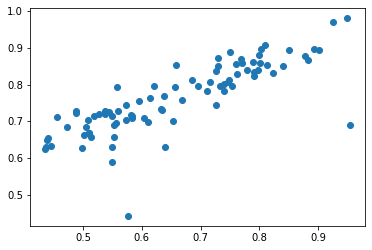

In [26]:
yes = []
total = []
_all = []
yes_p = []
yavka = []
for k,v in data.items():
    yes.append(v[4])
    total.append(v[4]+v[5])
    _all.append(v[0])
    yes_p.append(v[4]/(v[4]+v[5]))
    yavka.append((v[4]+v[5])/v[0])

fig, ax = plt.subplots()
ax.plot(yavka, yes_p, 'o')

Республика Тыва Сут-Хольская 5240
Республика Тыва Тес-Хемская 5745
Республика Тыва Улуг-Хемская 11202
Республика Тыва Тере-Хольская 1126
Краснодарский край Новороссийск, Судовая 116
Сахалинская область Невельская судовая 2405
Сахалинская область Холмская судовая 969
Территория за пределами РФ УИК №8009 98
Территория за пределами РФ УИК №8010 445
Территория за пределами РФ УИК №8015 1251
Территория за пределами РФ УИК №8016 78
Территория за пределами РФ УИК №8018 213
Территория за пределами РФ УИК №8022 289
Территория за пределами РФ УИК №8023 237
Территория за пределами РФ УИК №8025 43
Территория за пределами РФ УИК №8028 66
Территория за пределами РФ УИК №8030 59
Территория за пределами РФ УИК №8031 371
Территория за пределами РФ УИК №8032 802
Территория за пределами РФ УИК №8033 1227
Территория за пределами РФ УИК №8040 246
Территория за пределами РФ УИК №8041 50
Территория за пределами РФ УИК №8043 1022
Территория за пределами РФ УИК №8046 424
Территория за пределами РФ УИК №8047 33

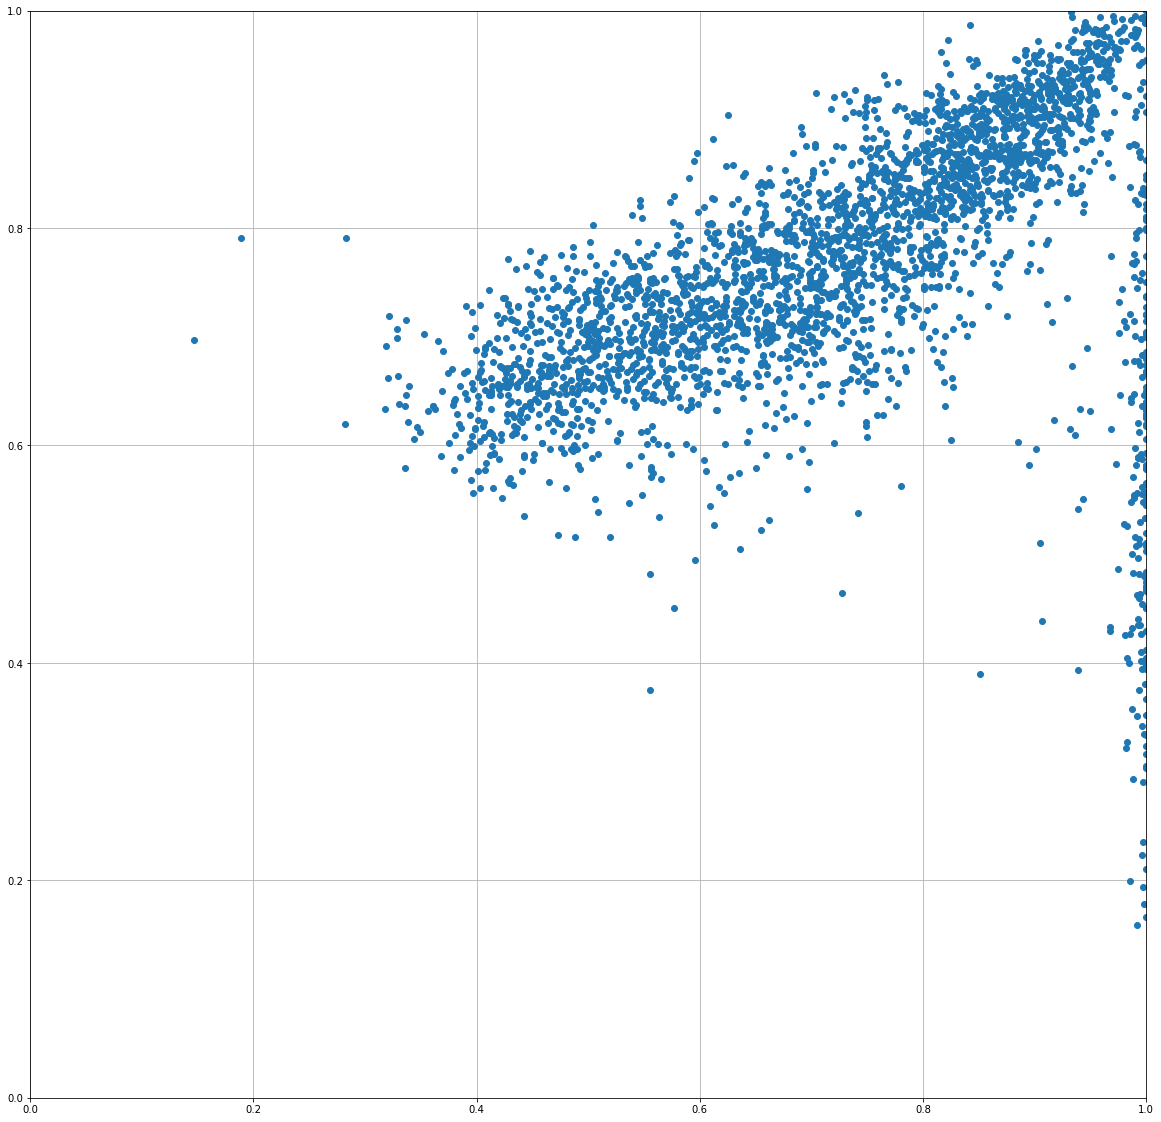

In [36]:
yes = []
total = []
_all = []
yes_p = []
yavka = []
for k1,v1 in data2.items():
    if k1=='Территория за пределами РФ':
        pass
        #continue
    for k,v in data2[k1].items():
        yes.append(v[4])
        total.append(v[4]+v[5])
        _all.append(v[0])
        yes_p.append(v[4]/(v[4]+v[5]))
        yavka.append((v[4]+v[5])/v[0])
        if (v[4]+v[5])/v[0]>0.99:
            print(k1,k,v[0])

fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(yavka, yes_p, 'o')
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True)

Вологодская область Вологодская городская УИК №1007 явка 0 из 0
Курская область Курск, Сеймская УИК №1118 явка 0 из 0
Мурманская область Мурманская УИК №565 явка 0 из 0
Мурманская область Мурманская УИК №566 явка 0 из 0
Свердловская область Екатеринбург, Октябрьская УИК №1697 явка 0 из 0
Ярославская область Ярославль, Ленинская УИК №2195 явка 0 из 0
Ярославская область Ярославль, Ленинская УИК №2196 явка 0 из 0
город Москва район Ново-Переделкино УИК №3759 явка 0 из 0
город Москва район Покровское-Стрешнево УИК №3769 явка 0 из 0
город Москва район Южное Тушино УИК №3790 явка 0 из 0
город Москва район Зябликово УИК №3722 явка 0 из 0


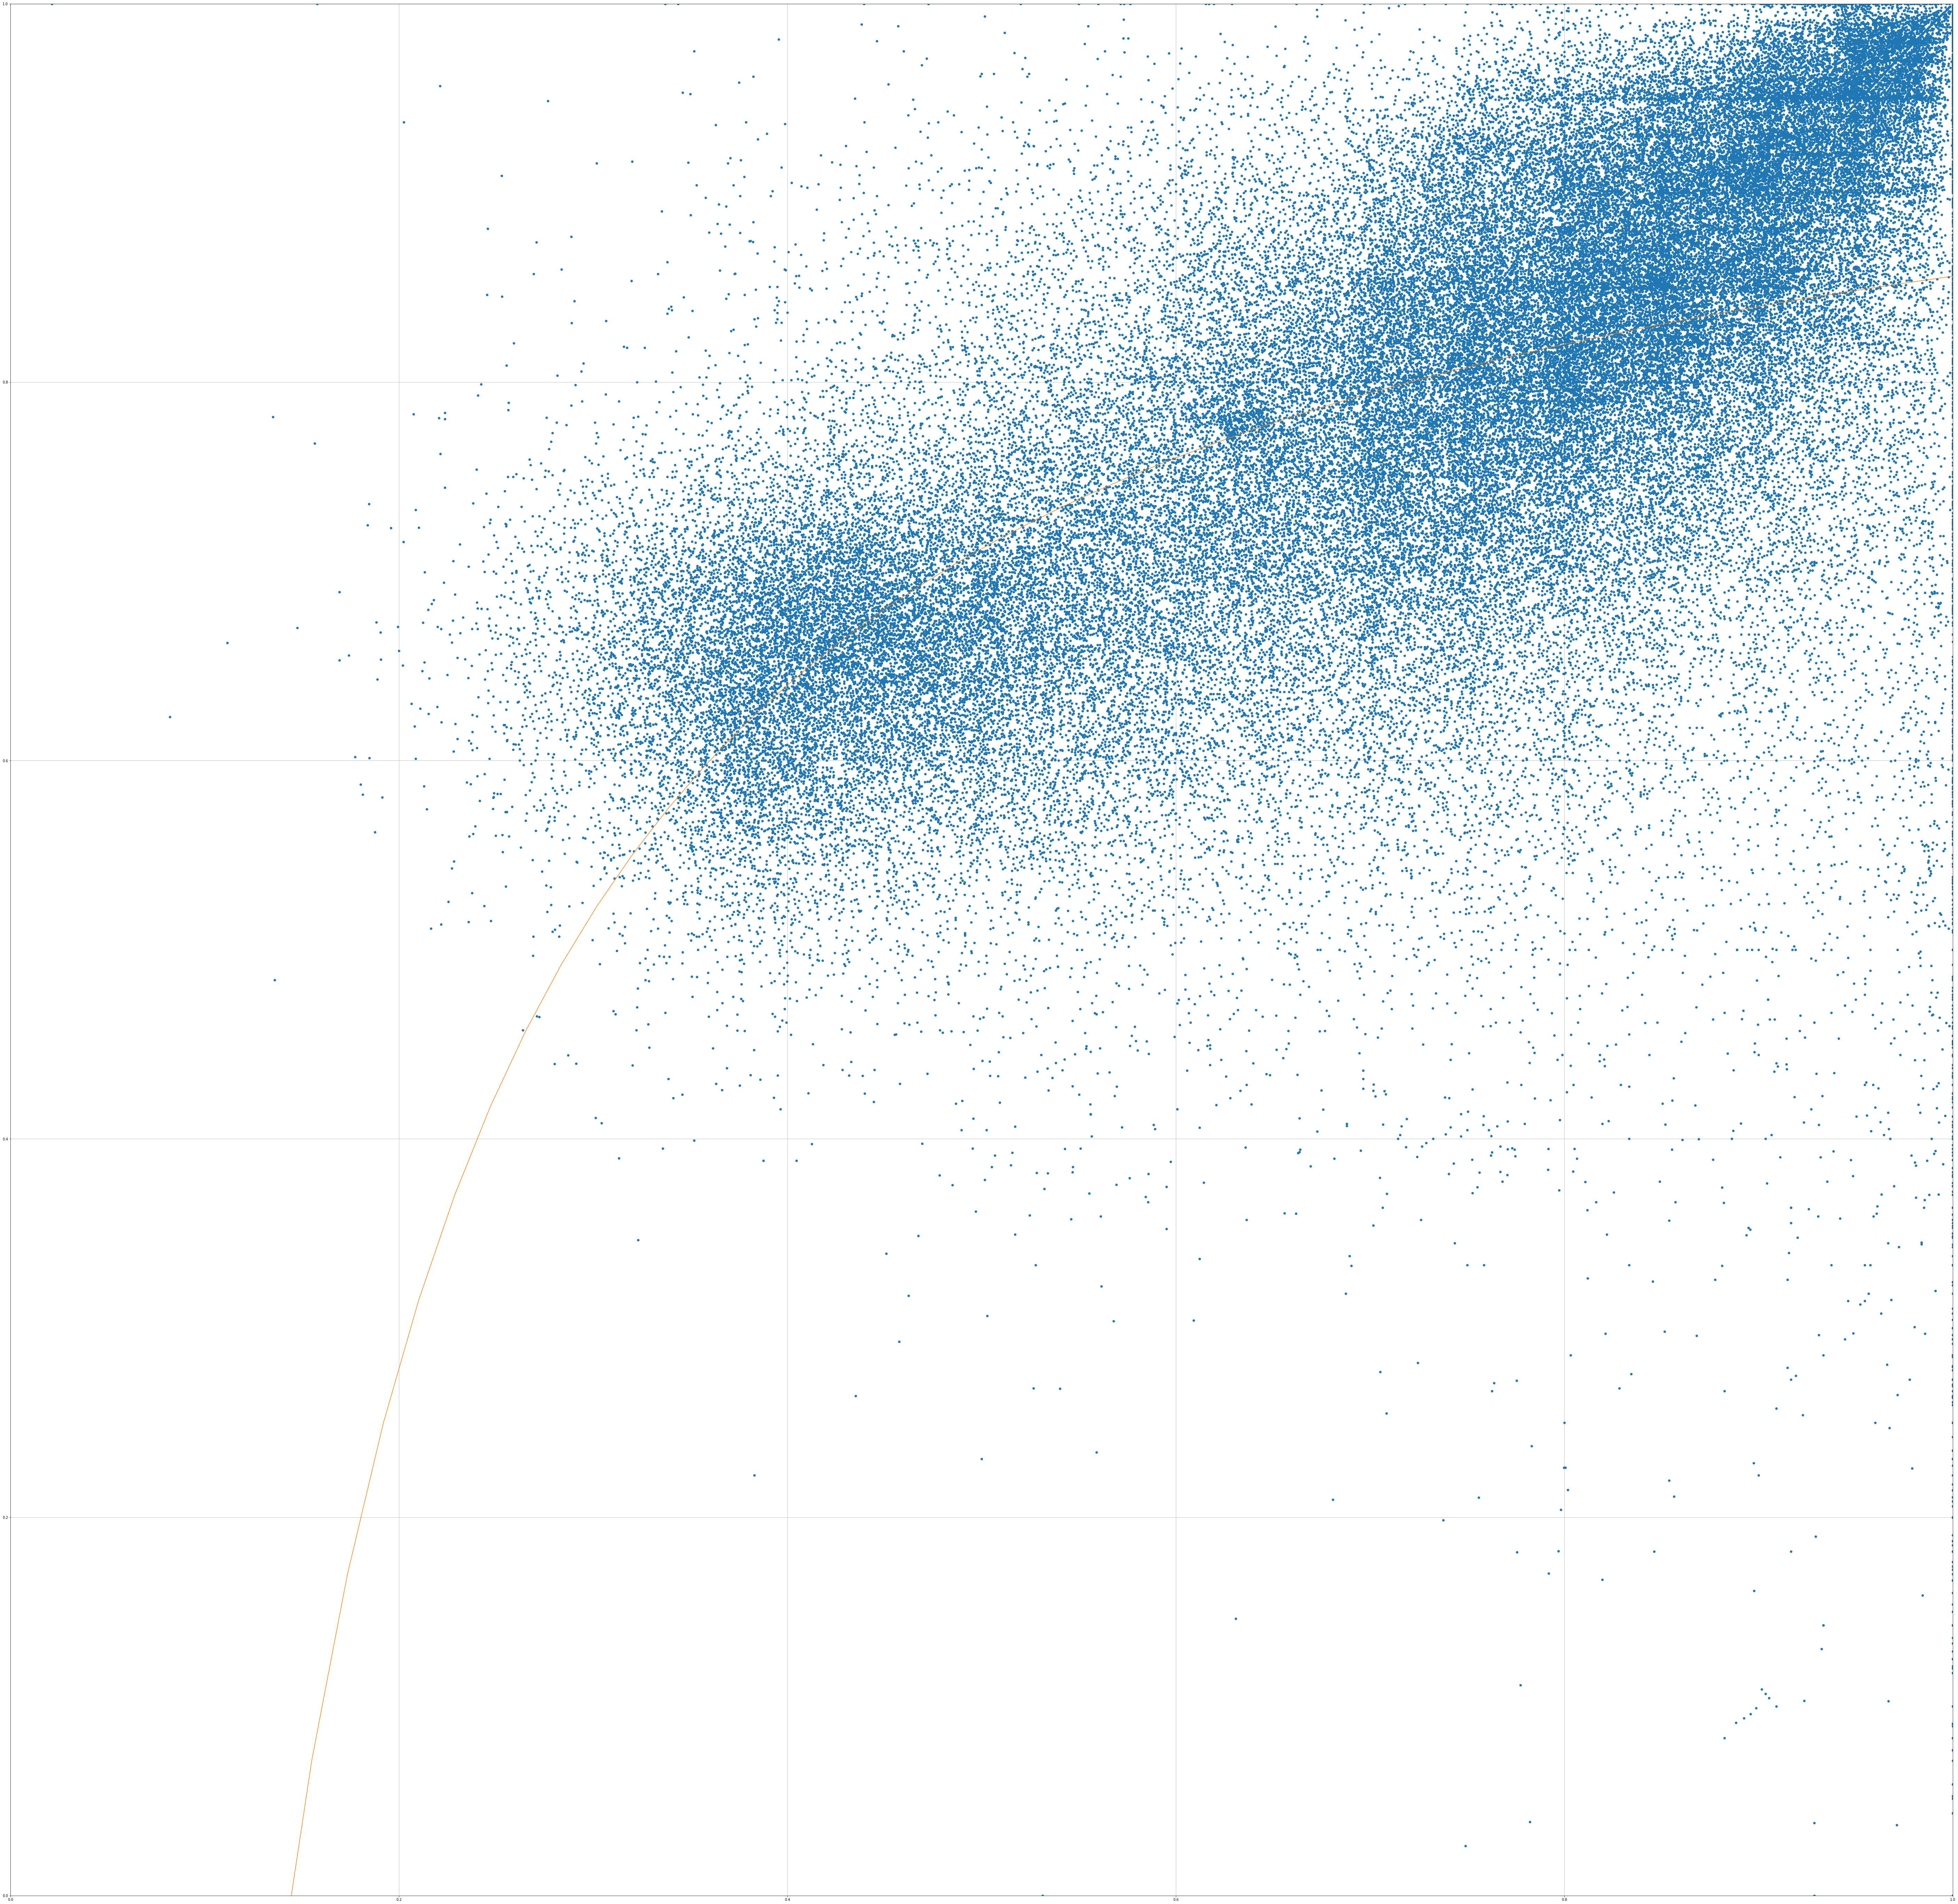

In [71]:
yes = []
total = []
_all = []
yes_p = []
yavka = []
for k1,v1 in data3.items():
    if k1=='Территория за пределами РФ':
        continue
    for k2,v2 in data3[k1].items():
        for k3,v in data3[k1][k2].items():
            if (v[4]+v[5])==0:
                print(k1,k2,k3,'явка 0 из',v[0])
                continue
            yes.append(v[4])
            total.append(v[4]+v[5])
            _all.append(v[0])
            yes_p.append(v[4]/(v[4]+v[5]))
            yavka.append((v[4]+v[5])/v[0])
            #if (v[4]+v[5])/v[0]>0.99:
            #    print(k1,k,v[0])

fig, ax = plt.subplots(figsize=(100, 100))
ax.plot(yavka, yes_p, 'o')

x = np.linspace(0.1, 1)
y = 1+0.45/x*(0.68-1)
ax.plot(x,y)

plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True)

419 460


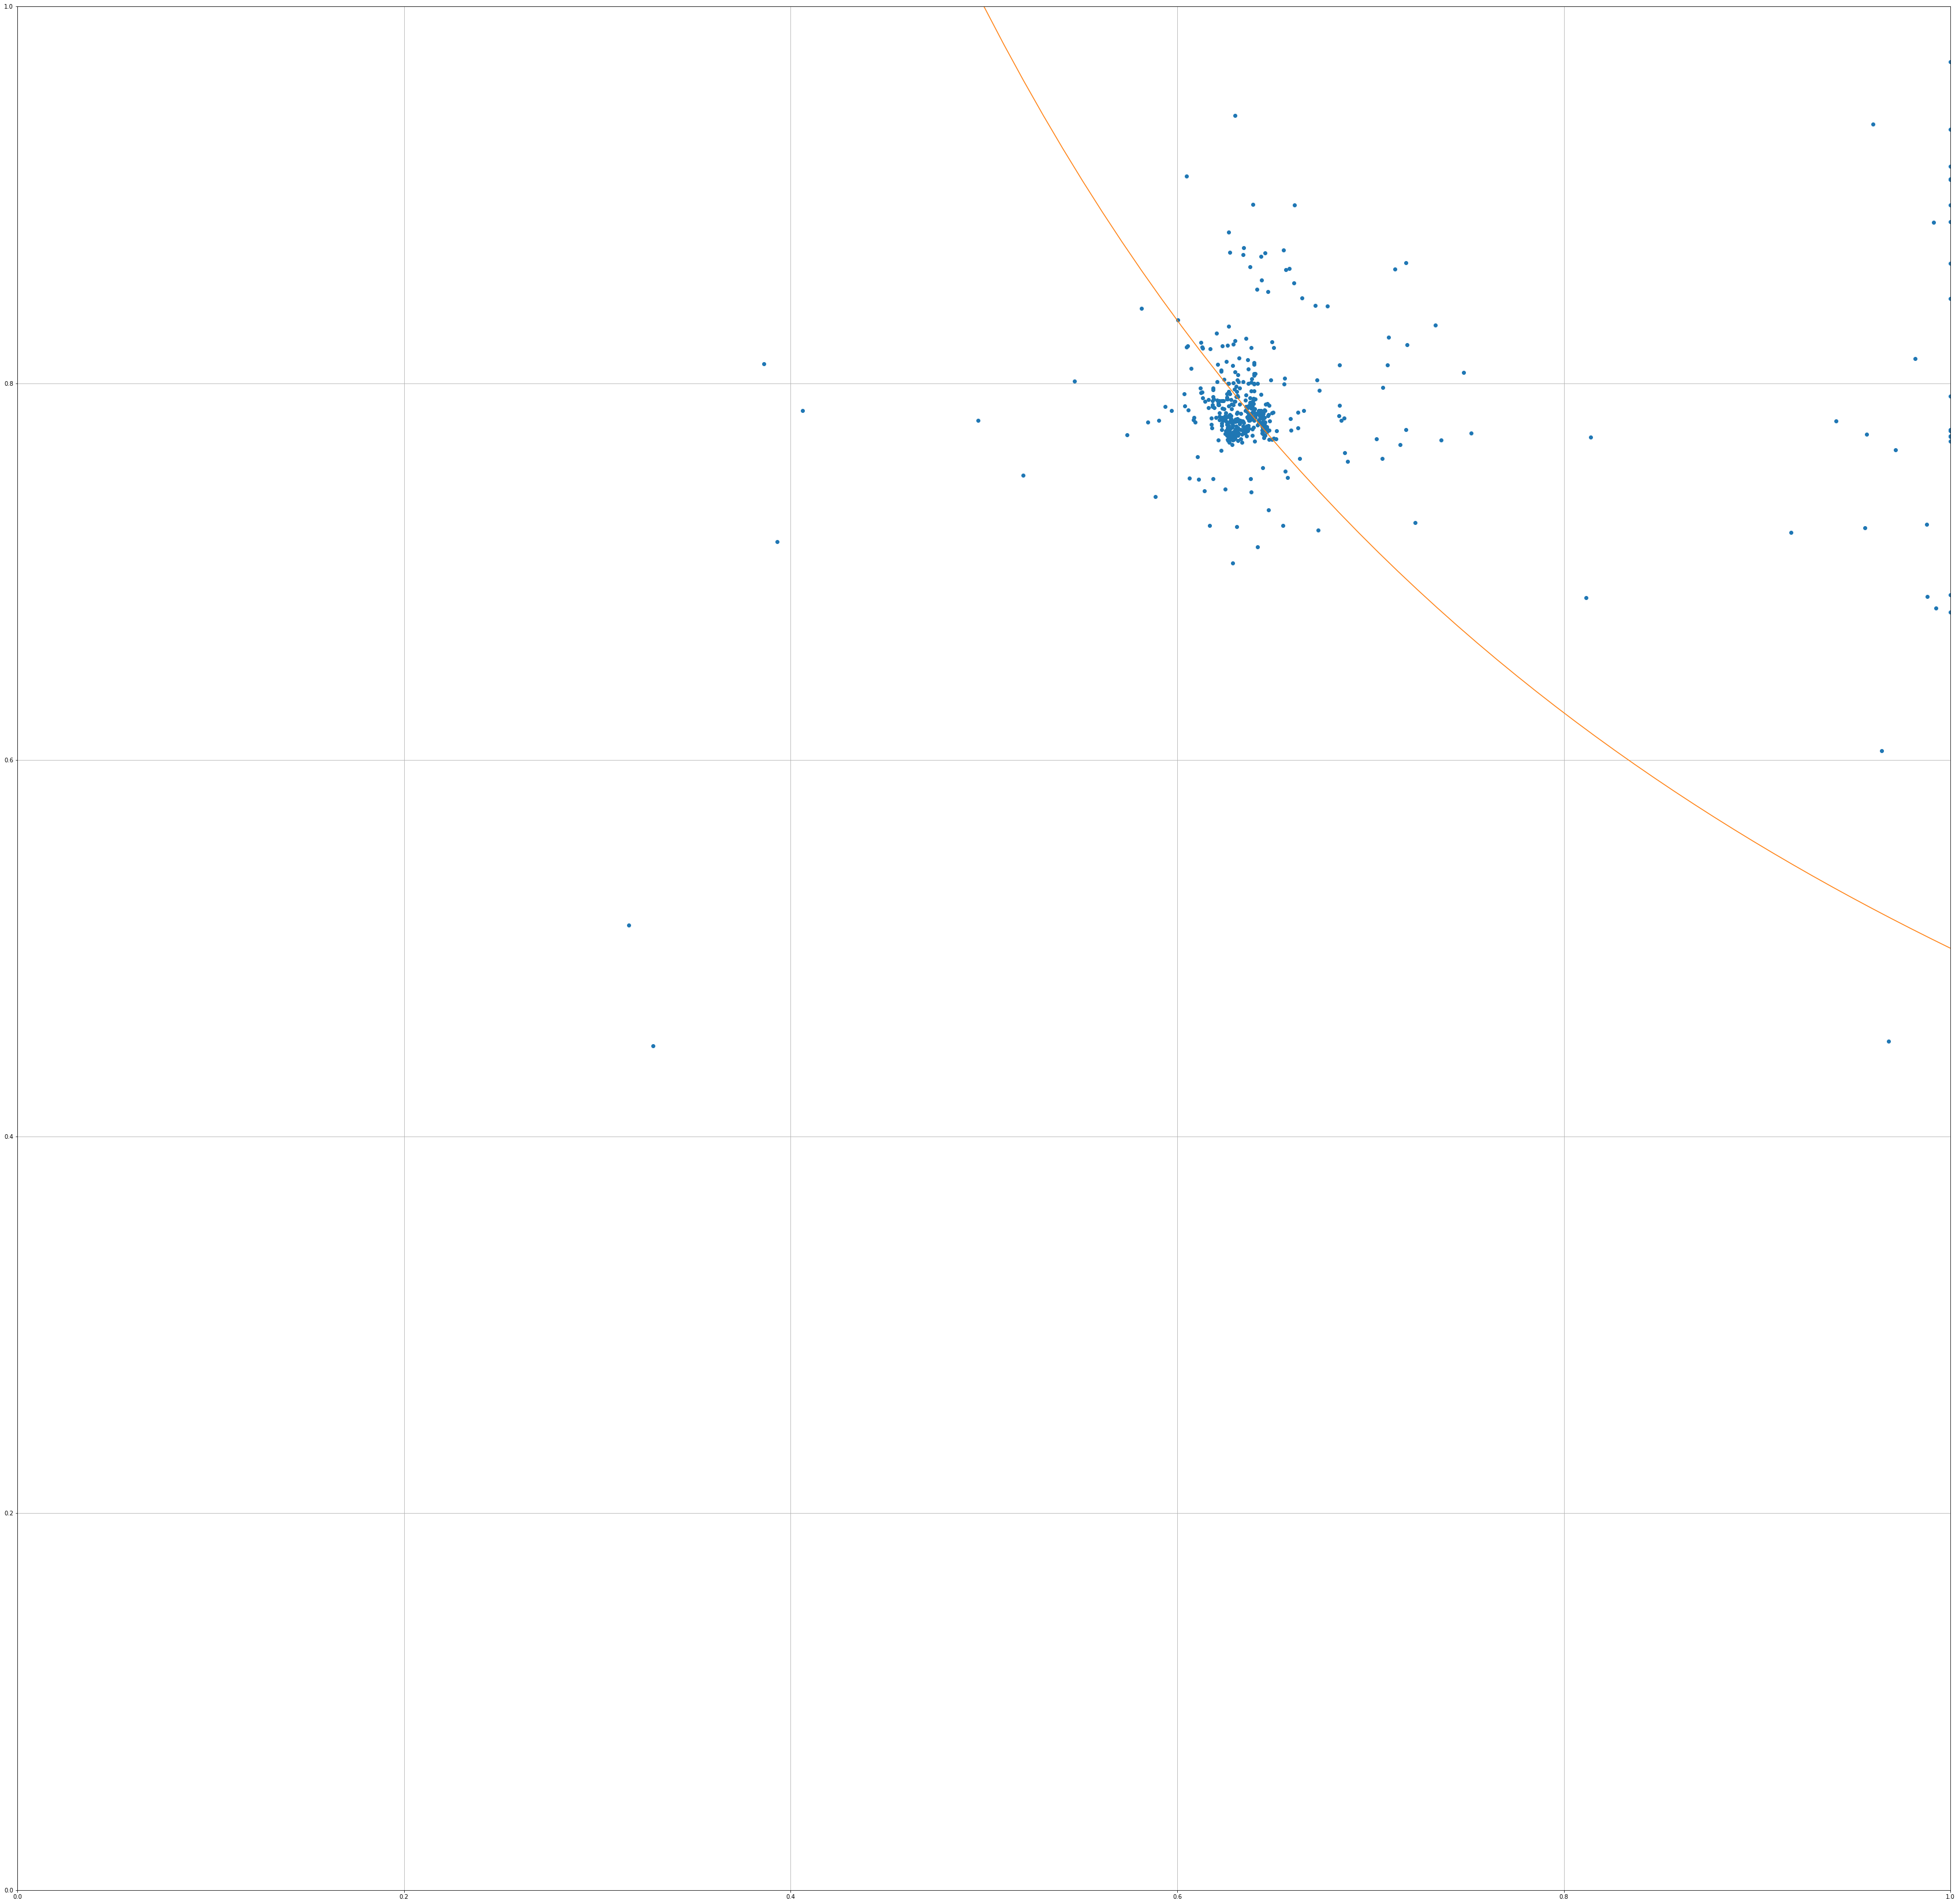

In [67]:
yes = []
total = []
_all = []
yes_p = []
yavka = []
count = 0
incount=0
for k1,v1 in data3.items():
    if k1!='Республика Татарстан (Татарстан)':
        continue
    for k2,v2 in data3[k1].items():
        if k2!='Казань, Авиастроительная' and \
            k2!='Казань, Вахитовская' and\
            k2!='Казань, Кировская' and\
            k2!='Казань, Московская' and\
            k2!='Казань, Ново-Савиновская' and\
            k2!='Казань, Приволжская' and\
            k2!='Казань, Советская':
            continue
        for k3,v in data3[k1][k2].items():
            if (v[4]+v[5])==0:
                print(k1,k2,k3,'явка 0 из',v[0])
                continue
            count+=1
            if abs(v[4]/v[0]-0.5)<0.1:
                incount+=1
            yes.append(v[4])
            total.append(v[4]+v[5])
            _all.append(v[0])
            yes_p.append(v[4]/(v[4]+v[5]))
            yavka.append((v[4]+v[5])/v[0])
            #if (v[4]+v[5])/v[0]>0.99:
            #    print(k1,k,v[0])
print(incount,count)
fig, ax = plt.subplots(figsize=(60,60))
ax.plot(yavka, yes_p, 'o')
x = np.linspace(0.5, 1)
y = 0.5/x
ax.plot(x,y)
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True)


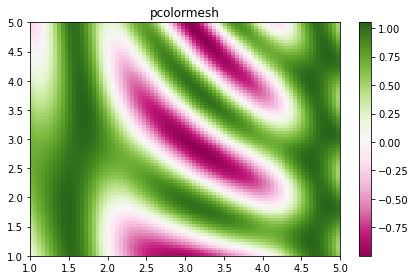

In [83]:
# make these smaller to increase the resolution
dx, dy = 0.01, 0.01

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(0, 1, dy),
                slice(0, 1, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
#z = z[:-1, :-1]

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
fig, ax0 = plt.subplots()

im = ax0.pcolormesh(x, y, z, cmap=cmap)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh')


# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

Вологодская область Вологодская городская УИК №1007 явка 0 из 0
Курская область Курск, Сеймская УИК №1118 явка 0 из 0
Мурманская область Мурманская УИК №565 явка 0 из 0
Мурманская область Мурманская УИК №566 явка 0 из 0
Свердловская область Екатеринбург, Октябрьская УИК №1697 явка 0 из 0
Ярославская область Ярославль, Ленинская УИК №2195 явка 0 из 0
Ярославская область Ярославль, Ленинская УИК №2196 явка 0 из 0
город Москва район Ново-Переделкино УИК №3759 явка 0 из 0
город Москва район Покровское-Стрешнево УИК №3769 явка 0 из 0
город Москва район Южное Тушино УИК №3790 явка 0 из 0
город Москва район Зябликово УИК №3722 явка 0 из 0


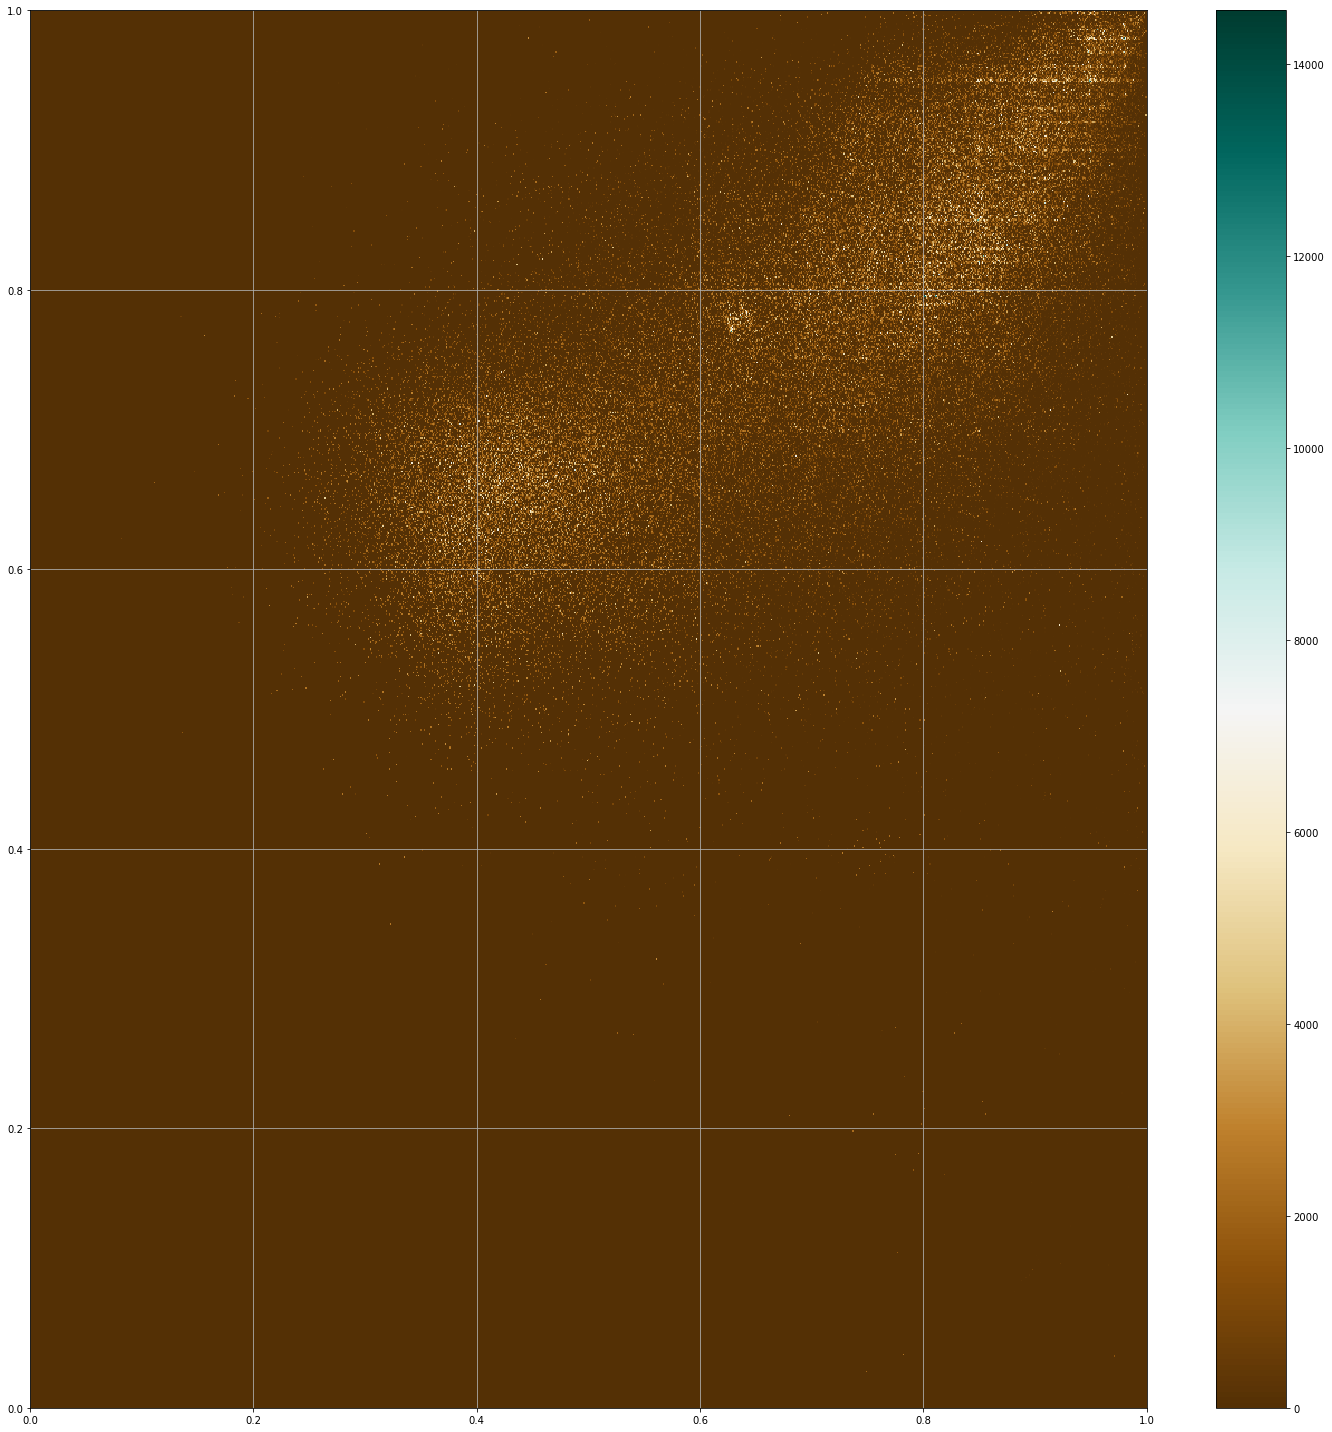

In [107]:
# make these smaller to increase the resolution
dx, dy = 0.001, 0.001

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(0, 1+dy, dy),
                slice(0, 1+dx, dx)]
z=np.zeros(x.shape)

for k1,v1 in data3.items():
    if k1=='Территория за пределами РФ':
        continue
    for k2,v2 in data3[k1].items():
        for k3,v in data3[k1][k2].items():
            if (v[4]+v[5])==0:
                print(k1,k2,k3,'явка 0 из',v[0])
                continue
            yes_p = (v[4]/(v[4]+v[5]))
            yavka = ((v[4]+v[5])/v[0])
            z[math.floor(yes_p/dx),math.floor(yavka/dx)]+=v[0]
            
cmap = plt.get_cmap('BrBG')
fig, ax0 = plt.subplots(figsize=(20,20))

im = ax0.pcolormesh(x, y, z, cmap=cmap)
fig.colorbar(im, ax=ax0)
#ax0.set_title('pcolormesh')


# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()
plt.grid(True)
plt.show()

In [92]:
import math
math.floor(1.5)

1